In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
folder = os.path.expanduser('~/Desktop/Machine Learning/data_ML_Project')
file_path = os.path.join(folder, 'JKP.csv')  # No extension

if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    print("File still not found!")

In [12]:
data.head()

,name,n_stocks,n_stocks_min,date,ret
0,age,502,8,1926-03-31,-0.086738
1,age,505,12,1926-04-30,-0.000572
2,age,510,17,1926-05-31,-0.006332
3,age,512,21,1926-06-30,-0.003012
4,age,503,23,1926-07-31,0.003211


In [4]:
# Find columns with string (object or string) dtype
print("String columns:", data.select_dtypes(include=["object", "string"]).columns.tolist())

String columns: ['location', 'name', 'freq', 'weighting', 'date']


In [5]:
# List of columns to drop
columns_to_drop = [ 
"location", "freq","weighting","direction"
]

data.drop(columns=columns_to_drop, inplace=True)

In [6]:
# Identify columns where more than 70% of values are NaN
nan_majority_columns = [column for column in data.columns if data[column].isna().mean() > 0.7]

print("Columns where the majority of values were converted to NaN:", nan_majority_columns)

data.drop(columns=nan_majority_columns, inplace=True)

Columns where the majority of values were converted to NaN: []


In [16]:
# Pivot the table
pivoted = data.pivot(index='date', columns='name', values='ret')

# Reset the index to make 'date' a normal column again
pivoted = pivoted.reset_index()

# Optional: remove any column names hierarchy if needed
pivoted.columns.name = None

pivoted.head()


,date,age,aliq_at,aliq_mat,ami_126d,at_be,at_gr1,at_me,at_turnover,be_gr1a,...,taccruals_at,taccruals_ni,tangibility,tax_gr1a,turnover_126d,turnover_var_126d,z_score,zero_trades_126d,zero_trades_21d,zero_trades_252d
0,1926-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024048,NaN
2,1926-03-31,-0.086738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023761,NaN
3,1926-04-30,-0.000572,NaN,NaN,-0.001413,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.002749,0.005894,NaN,-0.003067,-0.003162,NaN
4,1926-05-31,-0.006332,NaN,NaN,-0.003118,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003273,-0.002529,NaN,0.001155,-0.001833,NaN


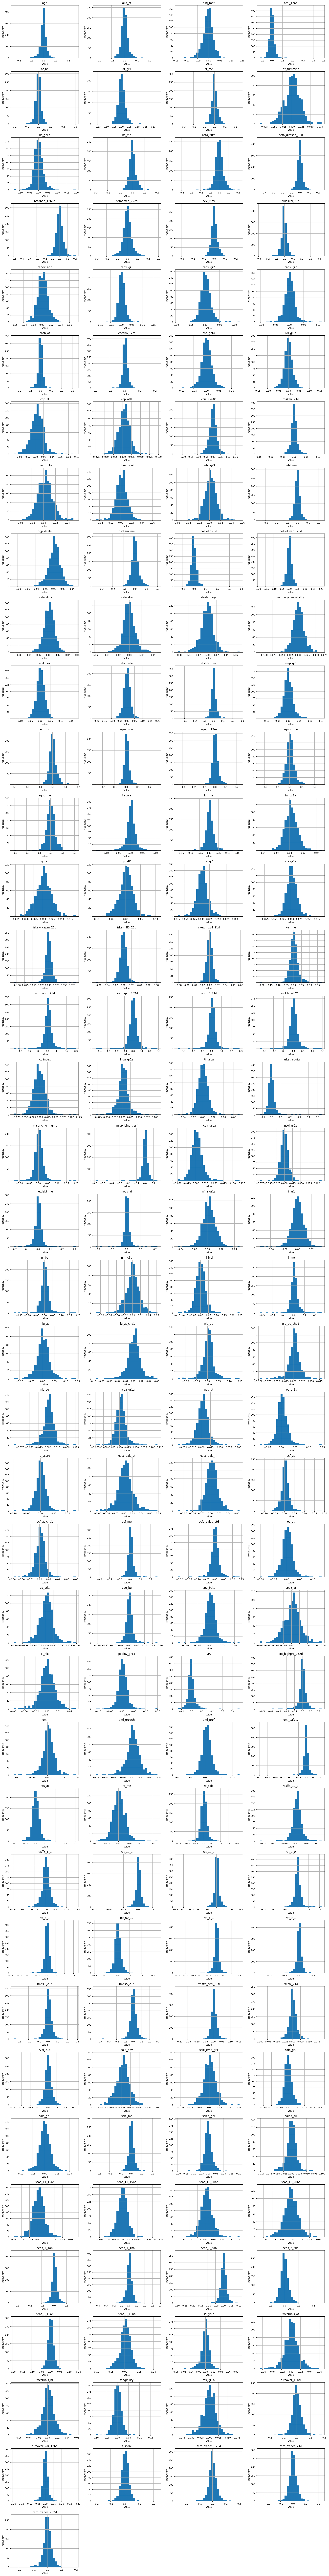

In [19]:
# Exclude identifier columns
exclude_columns = ['date']
columns = [col for col in pivoted.columns if col not in exclude_columns]

# Define number of subplots
n = len(columns)
cols = 4  # Number of plots per row
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each distribution
for i, col in enumerate(columns):
    pivoted[col].hist(bins=30, ax=axes[i])  # <-- use pivoted[col] here
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


as we can see the data is most of the normal 

In [20]:
for col in columns :
    # Normal imputation
    col_nonan = pivoted[col].dropna()
    mean_val = col_nonan.mean()
    std_val = col_nonan.std()
    if pd.notna(mean_val) and pd.notna(std_val) and std_val > 0:
        num_missing = pivoted[col].isna().sum()
        random_values = np.random.normal(loc=mean_val, scale=std_val, size=num_missing)
        pivoted.loc[pivoted[col].isna(), col] = random_values

In [21]:
pivoted.to_csv("JKP_filtered.csv", index=False)
